# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

*Цель исследования:*

Получить информацию о времени продажи квартиры.
Найти факторы, которые большего всего влияют на стоимость квартиры.
Изучить предложение квартир по локации.
Выделить и получить информацию по квартирам в центре Санкт-Петербурга.
*Ход исследования:*

В файле "real_estate_data.csv" содержится архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. По каждой квартире на продажу доступны два вида данных: 1) пользовательские 2) получены автоматически на основе картографических данных.

Т.к. часть данных записаны пользователями, они могут содержать ошибки. Ошибки также могут быть и в данных, полученных автоматически на основе картографических данных. Для начала нужен обзор данных. Далее, будем делать предобработку данных. Искать аномалии, пропущенные значения и т.д..

Для решения поставленных задач необходимо рассчитать и добавить в таблицу несколько показателей:

цена за 1 квадратный метр,
день недели, месяц и год публикации объявления,
этаж квартиры (первый, последний, другой).
Таким образом, исследование пройдёт в 5 этапов:

Обзор данных.
Предобработка данных.
Расчёты и добавление результатов в таблицу.
Исследовательский анализ данных.
Выводы

1.1 Импортируем библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

1.2 Читаем файл и изучаем общую информацию о нем

In [2]:
data=pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


Описание датафрейма

**airports_nearest** — расстояние до ближайшего аэропорта в метрах (м)

**balcony** — число балконов

**ceiling_height** — высота потолков (м)

**cityCenters_nearest** — расстояние до центра города (м)

**days_exposition** — сколько дней было размещено объявление (от публикации до снятия)

**first_day_exposition** — дата публикации

**floor** — этаж

**floors_total** — всего этажей в доме

**is_apartment** — апартаменты (булев тип)

**kitchen_area** — площадь кухни в квадратных метрах (м²)

**last_price** — цена на момент снятия с публикации

**living_area** — жилая площадь в квадратных метрах (м²)

**locality_name** — название населённого пункта

**open_plan** — свободная планировка (булев тип)

**parks_around3000** — число парков в радиусе 3 км

**parks_nearest** — расстояние до ближайшего парка (м)

**ponds_around3000** — число водоёмов в радиусе 3 км

**ponds_nearest** — расстояние до ближайшего водоёма (м)

**rooms** — число комнат

**studio** — квартира-студия (булев тип)

**total_area** — общая площадь квартиры в квадратных метрах (м²)

**total_images** — число фотографий квартиры в объявлении



In [3]:
#посмотрим общую информацию о датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
#посмотрим дополнительную информацию о датафрейме с помощью describe
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


**Общий вывод о представленном датафрейме**

last_price-имеет минимальную цену в 12.190-считаю маловероятной ценой для квартиры в Питере,так же иммем максимальную цену в 76.300.000 млн.Такая большая цена конечно возможна,но думаю что от нее нужно избавиться так как она может нарушить баланс иследования

rooms-количество комнат 0-скорее всего это ошибка в данных,такое маловероятно

ceiling_height - высота потолков 100метров.Явная ошибка

living_area - минимальная жилая площадь 2 кв м.Ошибка

kitchen_area- минимальная 2 кв м.Ошибка

airports_nearest - расстояние до аэропорта 0 -Ошибка

days_exposition- минимальные и максимальные сроки продажи в 1 день и 4 года.Могут повлиять на балланс иследования



**1.3 Посмотрим на общие количество дупликатов а также пропусков**

In [5]:
data.duplicated().sum()

0

In [6]:
data.isna().sum()
pd.DataFrame(data.isna().mean()*100).style.set_precision(1).background_gradient('coolwarm')

,0
total_images,0.0
last_price,0.0
total_area,0.0
first_day_exposition,0.0
rooms,0.0
ceiling_height,38.8
floors_total,0.4
living_area,8.0
floor,0.0
is_apartment,88.3


Дубликатов не имеем,а тепловая таблица прекрасно отображает количество пропусков

**1.4 Построим общую гистрограмму для данного датафрейма**

<function matplotlib.pyplot.show(close=None, block=None)>

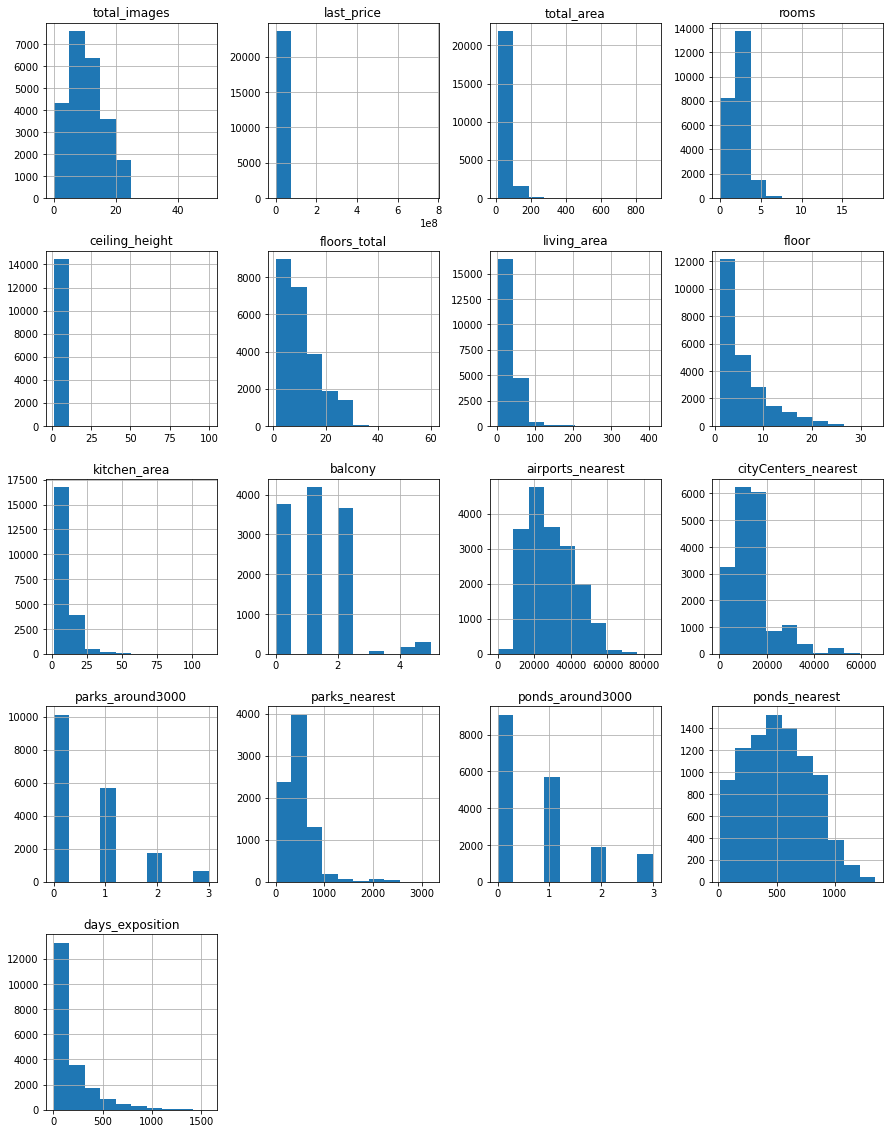

In [7]:
data.hist(figsize=(15,20))
plt.show

**Первый вывод**

Скоректировать тип файлов.

Скоректировать пропуски.

Привести к нижнему регистру имена.


### Предобработка данных

**2.1 Приведем имена столбцов к нижнему регистру**

In [8]:
data=data.rename(columns={'cityCenters_nearest':  'city_centers_nearest','parks_around3000':  'parks_around_3000','ponds_around3000':  'ponds_around_3000'})

**2.2 Посмотрим еще раз кол-во пропусков и их сумму**

In [9]:
#Заодно проверим переименование стобцов
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**ceiling_height**-Высота потолков 9195 ед.  **38.8%** Сущевственной значимости на наше иследование количество данных пропусков не несет,но не будем забыть что у 1/3 значение отсутвует.**Оставим пропуски**

**floors_total**-Всего этажей 86 ед.  **0.4%** Количество пропусков слишком мало.**Оставим пропуски**

**living_area**-Жилая плозадь 1903 ед.  **8%** Здесь возможно повлиял человеческий фактор на количество пропусков,значение слишком мало.**Оставим пропуски**

**is_apartment**-Аппартменты 20924 ед.  **88.3%** Количество пропусков просто огромное.Так как мы рассматриваем жилую недвижимость,вероятно пользовательи интуитивно не стали указывать об этом.Значение имееют булевый тип.**Нужно заменить кол-во просков на False**

**kitchen_area**-Площадь кухни 2278 ед.  **9.6%** Вероятно пользо,ватели просто не указывали размер кухни,на основные цели нашего иследование такое кол-во - не повлияет.**Оставим пропуски**

**balcony**-Количество балконов 11519 ед.  **48.6%** Судя по всему пользователи не указывали отсутвие балкона(просто пропустив значение).**Заменим пропуски на 0**

**locality_name**- Название населенного пункта 49ед.  **0.2%** На наше иследование не повлияет,количетсво слишком мало.**Оставим пропуски**

**airports_nearest**-Расстояние до аэропорта 5542ед.  **23.4%** Вероятно пользователи не знают(никогда не обращали на это внимание) заполним им медианным значение по названию насселнных пунктов.**Оставим пропуски**

**city_centers_nearest**- Растояние до центра города 5519ед.  **23.3%** Скорее всего ситуация как и в **airports_nearest**. заменим медиманным значением **Оставим пропуски**

**parks_nearest** - Растояние до парка 15620ед. **65.9%** Скоре всего ситуация такая же как и в предыдущих 2ух случаях. **Оставим пропуски**

**parks_around_3000** И **ponds_around_3000** - Расстояние до ближайшего парка и водоема в радиусе 3км 5518ед. **23.3%** -Количество пропусков одинаково,возможно связано с технической частью -но на наше иследование критечески не повлияет.**Оставим пропуски**

**ponds_nearest**-Расстояние до ближашего водоема количество 14589 ед. **61.6%**- предполагаю что ситуаяция такая же как и в **parks_nearest**.Заполнить нечем. **Оставим пропуски**

**days_exposition**-Количество дней от публикации до  продажи 3181ед.  **13.4** Возможно техническая ошибка,при выгрузке данных,так как такая позиция должна заполниться автоматом,эти пропуски для нас важны но заполнить их нечем. **Оставим пропуски**

**2.3 Заполним пропуски там где это возможно**

In [10]:
#Заполняем аппрамтаменты
data['is_apartment'].fillna(False, inplace=True)
#проверяем
data['is_apartment'].isna().sum()

0

In [11]:
#заполняем балконы
data['balcony'].fillna(0,inplace=True)
#проверяем
data['balcony'].isna().sum()

0

In [12]:
#заполняем пропуски по высоте потолков медианным значением относительно населенных пунктов
for i in data['locality_name'].unique():
    median_value=data.loc[data['locality_name']==i,'ceiling_height'].median()
    data.loc[(data['ceiling_height'].isna())&(data['locality_name']==i),'ceiling_height'].median()

data.loc[data['ceiling_height'].isna(),'ceiling_height']=data['ceiling_height'].median()


In [13]:
#проверим
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**2.4 Преобразуем типы данных**

In [14]:
#Преобразуем first_day_exposition в формат Date_time
data['first_day_exposition']=pd.to_datetime(data['first_day_exposition'],format='%Y-%m-%dT%H:%M:%S')
#Преобразуем 'last_price','days_exposition','floors_total','balcony','airports_nearest','city_сenters_nearest','parks_around_3000','parks_nearest','ponds_around_3000','ponds_nearest' в int
data['last_price']=data['last_price'].astype('int64',errors='ignore')
data['days_exposition']=data['days_exposition'].astype('int64',errors='ignore')
data['floors_total']=data['floors_total'].astype('int64',errors='ignore')
data['balcony']=data['balcony'].astype('int64',errors='ignore')
data['airports_nearest']=data['airports_nearest'].astype('int64',errors='ignore')
data['city_centers_nearest']=data['city_centers_nearest'].astype('int64',errors='ignore')
data['parks_around_3000']=data['parks_around_3000'].astype('int64',errors='ignore')
data['parks_nearest']=data['parks_nearest'].astype('int64',errors='ignore')
data['ponds_around_3000']=data['ponds_around_3000'].astype('int64',errors='ignore')
data['ponds_nearest']=data['ponds_nearest'].astype('int64',errors='ignore')
#преобразуем is_apartment в булевой тип
data['is_apartment']=data['is_apartment'].astype('boolean')
                                                 

In [15]:
#проверим
data.dtypes

total_images                     int64
last_price                       int64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
is_apartment                   boolean
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
city_centers_nearest           float64
parks_around_3000              float64
parks_nearest                  float64
ponds_around_3000              float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

В ходе преобразование данных удалось изменить:

**first_day_exposition**

**last_price**

**balcony**

**airports_nearest**

**city_centers_nearest**

**is_apartment**

Замена типа данных повысит наглядность и эффективность обработки,как раз изменились именно те данные которые нам критически важны

**2.5 Проверка на дубликаты**

In [16]:
#проверка на явные дубликаты
data.duplicated().sum()

0

In [17]:
#Проверка на неявные дубликаты
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

заметно что **''поселок'**' И **''посёлок'**' повторяются.

Так же заметно что повторяются:

**'посёлок городского типа Мга'**' И **''городской посёлок Мга'**'

**''городской посёлок Павлово'**' И **''посёлок городского типа Павлово'**'

**''городской посёлок Рощино'**' И **' 'посёлок городского типа Рощино'**'


In [18]:
#замена поселок на посёлок
data['locality_name']=data['locality_name'].str.replace('поселок','посёлок')

In [19]:
#замена посёлков в названии
data=data.replace({'locality_name':{'посёлок городского типа Мга':  'городской посёлок Мга', 'городской посёлок Павлово':  'посёлок городского типа Павлово','городской посёлок Рощино':  'посёлок городского типа Рощино'}})


In [20]:
#проверяем
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской посёлок Большая Ижора', 'городской посёлок Будогощь',
       'городской посёлок Виллози', 'городской посёлок Лесогорский',
       'городской посёлок Мга', 'городской посёлок Назия',
       'городской посёлок Новоселье', 'городской посёлок Свирьстрой',
       'городской посёлок Советский', 'городской посёлок Фёдоровское',
       'городской посёлок Янино-1', 'деревня Агалатов

In [21]:
#удалим строки нан
data = data.dropna(subset=['locality_name'])
#првоеряем
data['locality_name'].isna().sum()

0

### Предобработка данных

**3.1 Устранение аномалий**

В ходе иследования выявлены следующие аномалии

**last_price**-имеет минимальную цену в 12.190-считаю маловероятной ценой для квартиры в Питере,так же иммем максимальную цену в 76.300.000 млн

**rooms**-количество комнат 0

**ceiling_height** - высота потолков 100метров.

**living_area** - минимальная жилая площадь 2 кв м.

**airports_nearest** - расстояние до аэропорта 0.

In [22]:
#last_price-проверим дешевые квартиры
data[data['last_price']<1500000].sort_values(by='last_price').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
8793,7,12190,109.0,2019-03-20,2,2.75,25.0,32.0,25,False,...,40.5,0,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0
17456,7,430000,30.4,2019-04-22,1,2.65,2.0,16.0,1,False,...,6.0,0,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14911,5,430000,54.0,2018-06-26,2,2.65,3.0,NaN,3,False,...,NaN,0,посёлок станции Свирь,NaN,NaN,NaN,NaN,NaN,NaN,44.0
16274,18,440000,40.0,2018-07-10,1,2.65,5.0,NaN,1,False,...,NaN,0,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,45.0
5698,7,450000,42.0,2017-07-31,2,2.65,1.0,23.0,1,False,...,5.8,0,городской посёлок Будогощь,NaN,NaN,NaN,NaN,NaN,NaN,233.0


Цены в представленных квартирах странные,но все таки они есть,предпологаю что  цена в 12т просто не дописанное значение по этому умножим ее на 1000

In [23]:
#переоценим ее
data.loc[data['last_price']==12190,'last_price']*=1000

In [24]:
#напишем функцию для возврата усов диаграммы
def mous(col):
    descr=col.describe()
    irq=(descr['75%'] - descr['25%'])*3
    minimum=max(descr['25%']-irq,descr['min'])
    maximum=min(descr['75%']+irq,descr['max'])
    return minimum,maximum

In [25]:
#обрезка усов цен на квартиры
try:
    min_mus,max_mus=mous(data['last_price'])
    print('Диапозон квартир:',min_mus,'-',max_mus+1000000)
    data=data[(data['last_price']<max_mus<100000)&(data['last_price']>min_mus)]
except:
    print()

Диапозон квартир: 430000.0 - 17996000.0



In [26]:
try:
    min_mus,max_mus=mous(data['rooms'])
    print('Диапозон количества комнат:',min_mus+1,'-',max_mus)
    data=data[(data['rooms']<max_mus)&(data['rooms']>min_mus)]
except:
    print()

Диапозон количества комнат: 1.0 - 9.0


In [27]:
try:
    min_mus,max_mus=mous(data['living_area'])
    print('Диапозон жилой площади:',min_mus+15,'-',max_mus)
    data=data[(data['living_area']<max_mus)&(data['living_area']>min_mus+15)]
except:
    print()

Диапозон жилой площади: 17.0 - 113.5


In [28]:
#посмотрим кол-во квартир близких к аэропорту
data[data['airports_nearest']<1000].sort_values(by='airports_nearest')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
21085,0,7000000,34.7,2018-09-23,1,2.7,9.0,19.8,3,False,...,6.0,2,Санкт-Петербург,0.0,22801.0,0.0,NaN,0.0,NaN,60.0


In [29]:
#Удалим 1 строку
data=data[data['airports_nearest']!=0]

In [30]:
try:
    min_mus,max_mus=mous(data['ceiling_height'])
    print('Диапозон потолков:',min_mus,'-',max_mus+1)
    data.loc[((data['ceiling_height']<min_mus)|(data['ceiling_height']))]
except:
    print()

Диапозон потолков: 2.3 - 4.0


**Вывод:**
В ходе работы привели к нижнему регистру стобцы,обработали дубликаты,заполнили пропуски а так же в ходе обработки аномальных значений были установлены определенные параметры,иные данные были удалены

**4.1** Добавление данных в таблицу

**price_one_square_meter**-Цена одного кв метра

**exposition_weekday**-день недели публикации

**exposition_month**-Месяц публикации 

**exposition_year**-Год публикации

**floor_category**- Тип этажа квартиры

**city_centers_nearest_km**-Растояние до Ц в километрах

In [31]:
#добавим price_one_square_meter
data['price_one_square_meter']=data['last_price']/data['total_area']
#добавим exposition_weekday
data['exposition_weekday']=data['first_day_exposition'].dt.weekday
#добавим exposition_month
data['exposition_month']=data['first_day_exposition'].dt.month
#добавим exposition_year
data['exposition_year']=data['first_day_exposition'].dt.year
#добавим city_centers_nearest_km
data['city_centers_nearest_km']=round(data['city_centers_nearest']/1000)

In [32]:
#напишем функцию для категоризации данных
def get_floor_category(row):
    floor=row['floor']
    floors_total=row['floors_total']
    if floor==1:
        return 'первый'
    elif floor==floors_total:
        return 'последний'
    else:
        return 'другой'
data['floor_category']=data.apply(get_floor_category,axis=1)

In [33]:
#проверим
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_one_square_meter,exposition_weekday,exposition_month,exposition_year,city_centers_nearest_km,floor_category
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,16.0,другой
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,19.0,первый
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,14.0,другой
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,8.0,другой
9,18,5400000,61.0,2017-02-26,3,2.50,9.0,43.6,7,False,...,NaN,0.0,NaN,289.0,88524.590164,6,2,2017,15.0,другой
10,5,5050000,39.6,2017-11-16,1,2.67,12.0,20.3,3,False,...,310.0,2.0,553.0,137.0,127525.252525,3,11,2017,14.0,другой
11,9,3300000,44.0,2018-08-27,2,2.65,5.0,31.0,4,False,...,NaN,0.0,NaN,7.0,75000.000000,0,8,2018,52.0,другой
12,10,3890000,54.0,2016-06-30,2,2.65,5.0,30.0,5,False,...,NaN,NaN,NaN,90.0,72037.037037,3,6,2016,NaN,последний
13,20,3550000,42.8,2017-07-01,2,2.56,5.0,27.0,5,False,...,294.0,3.0,298.0,366.0,82943.925234,5,7,2017,33.0,последний
15,16,4650000,39.0,2017-11-18,1,2.65,14.0,20.5,5,False,...,590.0,1.0,296.0,19.0,119230.769231,5,11,2017,14.0,другой


In [34]:
data.shape[0]

18175

В ходе выполнения данного пункта,в таблицу были добавлены столбцы,для более успешного иследовательского анализа.В ходе очистки данных,было потерено 25% **Уважаемый ревьюер прошу обратите внимание**Такой большйо срез,получился из за среза слишком дешывых и дорогих квартир-По этому ушло строк больше чем обычно.Я считаю что это обосновано!Потому что расчет идет для бизнеса,который заинтересован получать хорошую прибыль,мы продаем квартиры в Санкт-Петербурге,считаю что рассматривать квартиры с мальньким метражом не целесообразно-так как такие кватриры в первую очередь покупают риэлторы для перепродажи - они и так уйдут!А вот продать квартиру большая площадью уже задача сложнее,именно по этому Я рассматриваю такие варианты,так будет проще скоректировать и сблансировать бюджет для успешной рекламы продажи больших квартир!

### Проведите исследовательский анализ данных

Общая площадь

In [35]:
#описательная часть столбца total_area
data['total_area'].describe()

count    18175.000000
mean        62.103733
std         26.503252
min         22.500000
25%         44.100000
50%         56.200000
75%         72.300000
max        413.500000
Name: total_area, dtype: float64

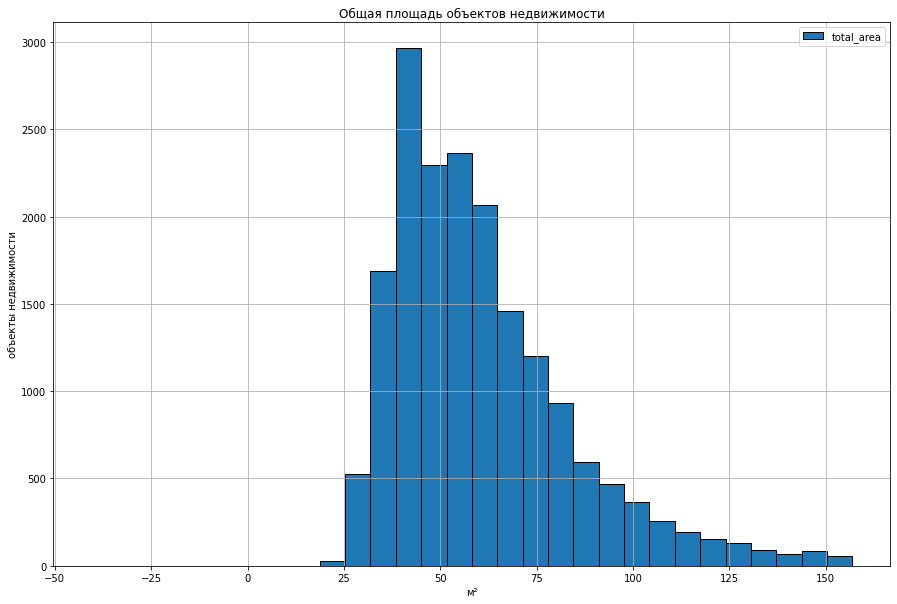

In [36]:
#постороим гистаграмму по квантилям 25 и 75
q1=data['total_area'].quantile(.25)
q3=data['total_area'].quantile(.75)
iqr=q3-q1
data['total_area'].hist(range=((q1-3*iqr),(q3+3*iqr)),bins=30,figsize=(15,10), ec='black',legend=True)
plt.title('Общая площадь объектов недвижимости')
plt.xlabel('м²')
plt.ylabel('объекты недвижимости')
plt.show()


Рассматриваемый диапозон от 25 до 150кв м

Квартиры меньше 30кв м  и больше 90 -редкость

Самый популярный вариант примерно от 45 до 80 кв м

Среднее значение 62 медиана 56-оба стремяться к большему

Отклонений не так много,график чуть растянут

**Жилая площадь**

In [37]:
data['living_area'].describe()

count    18175.000000
mean        36.167261
std         16.147515
min         17.010000
25%         26.000000
50%         32.000000
75%         43.800000
max        113.000000
Name: living_area, dtype: float64

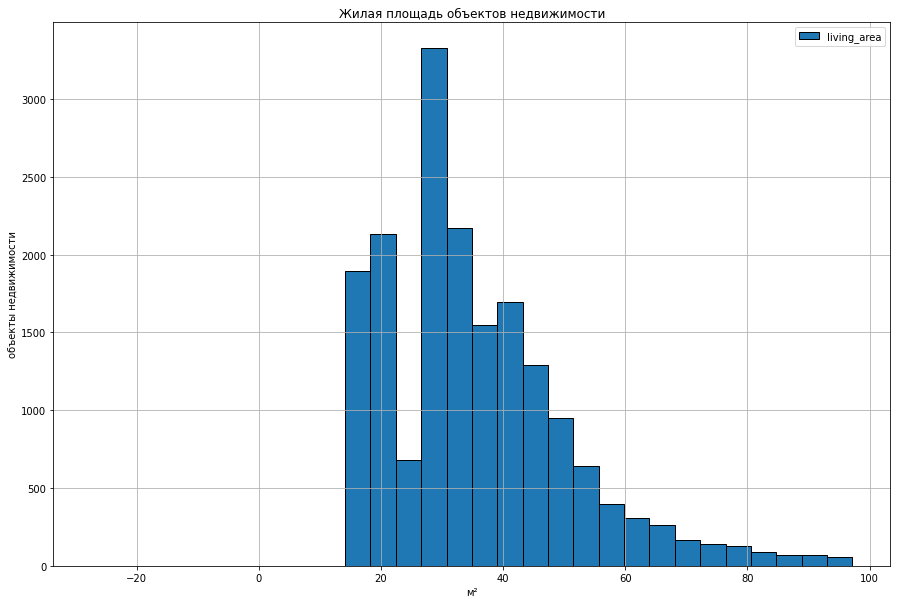

In [38]:
#Построим гистограмму
q1=data['living_area'].quantile(.25)
q3=data['living_area'].quantile(.75)
iqr=q3-q1
data['living_area'].hist(range=((q1-3*iqr),(q3+3*iqr)),bins=30,figsize=(15,10), ec='black',legend=True)
plt.title('Жилая площадь объектов недвижимости')
plt.xlabel('м²')
plt.ylabel('объекты недвижимости')
plt.show()


Рассматривыемый вариант от 17 до 80 квм

Очень много квартир от 35 до 45 квм

Среднее значение 36 медиана 32

У графика имеется хвост,из за редких но больших значений

**Площадь кухни**

In [39]:
data['kitchen_area'].describe()

count    17696.000000
mean        10.450453
std          5.660315
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64

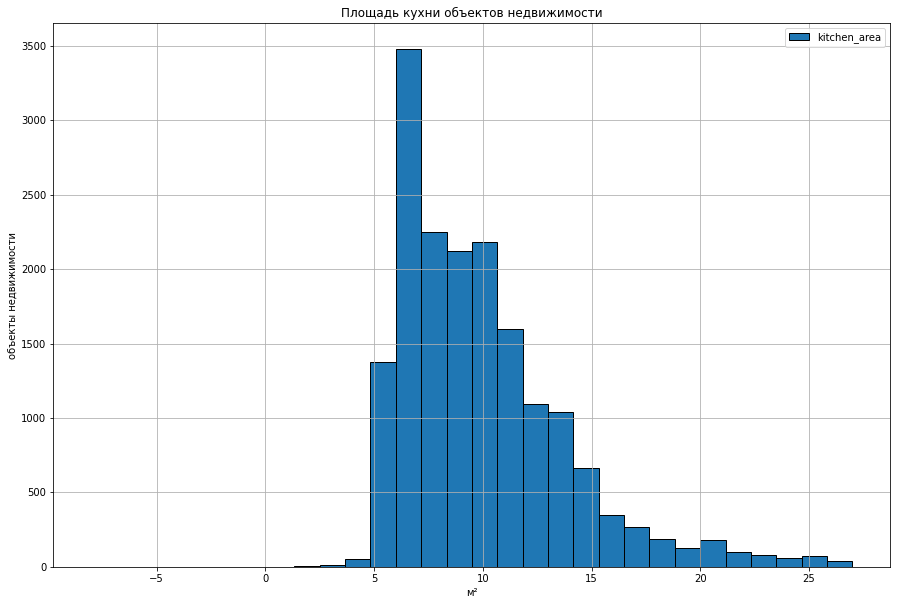

In [40]:
q1=data['kitchen_area'].quantile(.25)
q3=data['kitchen_area'].quantile(.75)
iqr=q3-q1
data['kitchen_area'].hist(range=((q1-3*iqr),(q3+3*iqr)),bins=30,figsize=(15,10), ec='black',legend=True)
plt.title('Площадь кухни объектов недвижимости')
plt.xlabel('м²')
plt.ylabel('объекты недвижимости')
plt.show()


Рассматривыемый диапозон от 5 до 25 квм

Самый популярный вариант 7 квм

Среднее значени 10 медиана 9 квм

У графика такой же хвостик из за редких но больших значений



**Последняя цена**

In [41]:
data['last_price'].describe()/1000000

count      0.018175
mean       6.445552
std        6.691031
min        0.450000
25%        3.700000
50%        4.990000
75%        7.150000
max      330.000000
Name: last_price, dtype: float64

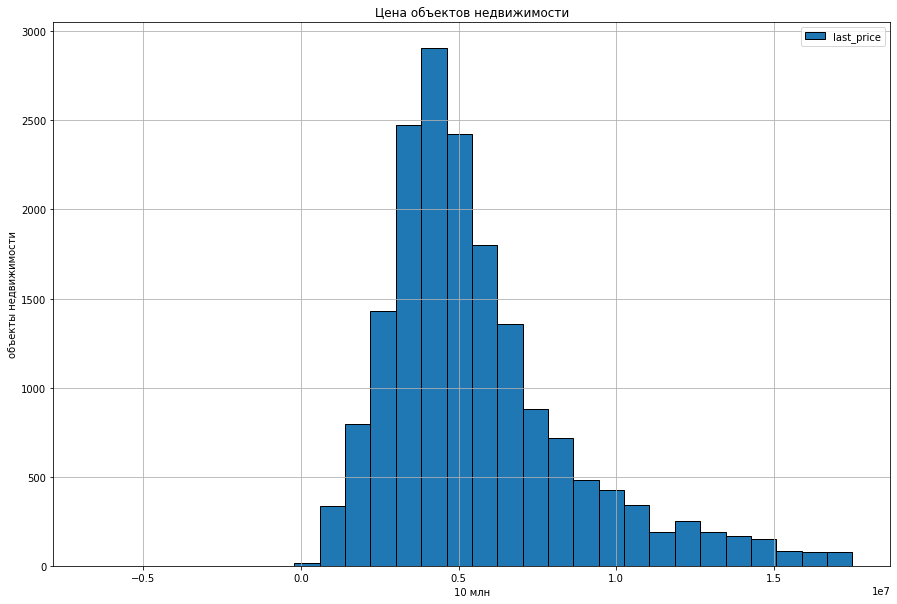

In [42]:
q1=data['last_price'].quantile(.25)
q3=data['last_price'].quantile(.75)
iqr=q3-q1
data['last_price'].hist(range=((q1-3*iqr),(q3+3*iqr)),bins=30,figsize=(15,10), ec='black',legend=True)
plt.title('Цена объектов недвижимости')
plt.xlabel('10 млн')
plt.ylabel('объекты недвижимости')
plt.show()

Рассматривыемый диапозон от 1 до 10 млн

Самый популярный вариант 3млн

Среднее значени 6 медиана 4 млн

У графика такой же хвостик из за редких но больших значений

**Количество комнат**

In [43]:
data['rooms'].describe()

count    18175.000000
mean         2.222283
std          0.932342
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: rooms, dtype: float64

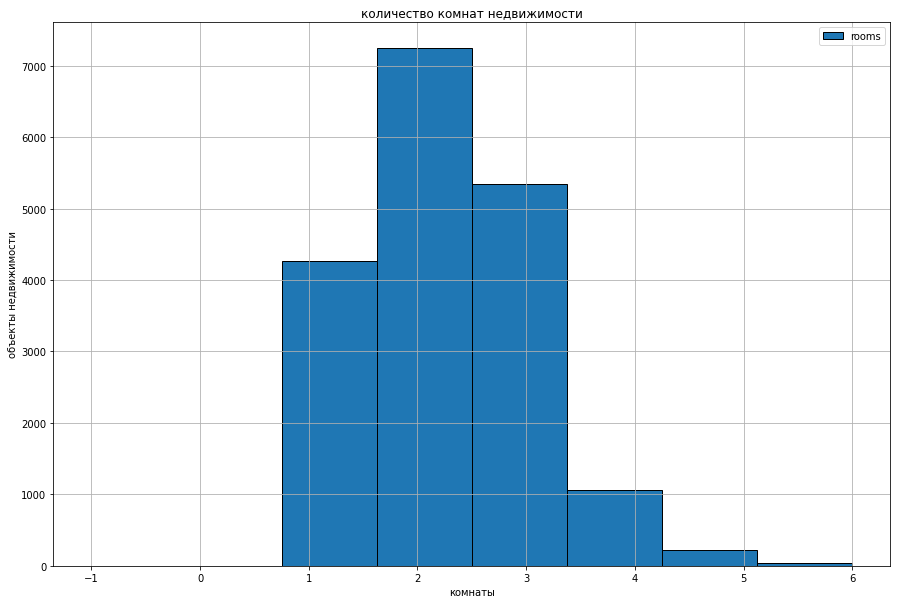

In [44]:
q1=data['rooms'].quantile(.25)
q3=data['rooms'].quantile(.75)
iqr=q3-q1
data['rooms'].hist(range=((q1-3*iqr),(q3+3*iqr)),bins=8,figsize=(15,10), ec='black',legend=True)
plt.title('количество комнат недвижимости')
plt.xlabel('комнаты')
plt.ylabel('объекты недвижимости')
plt.show()

Рассматривыемый диапозон 6 комнат

Самый популярный вариант 2 комнтные

Среднее значени 2 медиана 2 комнты

У графика имеется маленький хвостик начиная свыше 4 комнат(но никакого влияния на график он не оказывает)


**Высота потолков**

In [45]:
data['ceiling_height'].describe()

count    18175.000000
mean         2.725415
std          0.820000
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         32.000000
Name: ceiling_height, dtype: float64

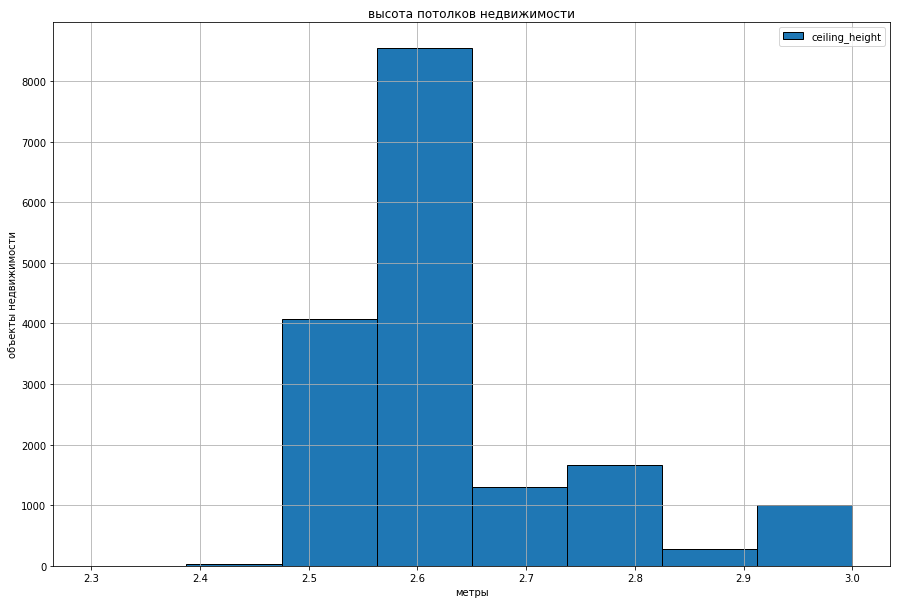

In [46]:
q1=data['ceiling_height'].quantile(.25)
q3=data['ceiling_height'].quantile(.75)
iqr=q3-q1
data['ceiling_height'].hist(range=((q1-3*iqr),(q3+3*iqr)),bins=8,figsize=(15,10), ec='black',legend=True)
plt.title('высота потолков недвижимости')
plt.xlabel('метры')
plt.ylabel('объекты недвижимости')
plt.show()

Рассматривыемый диапозон от 2.5 до 3.м

Самые расспространенные потолки 2.6 м

Среднее значени и медианы равно 2.65

Потолки свыше 2.7 хоть и имеются но никакого влияния не оказывают на график

**Этажи**

In [47]:
data['floor'].describe()

count    18175.000000
mean         5.617552
std          4.623497
min          1.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         33.000000
Name: floor, dtype: float64

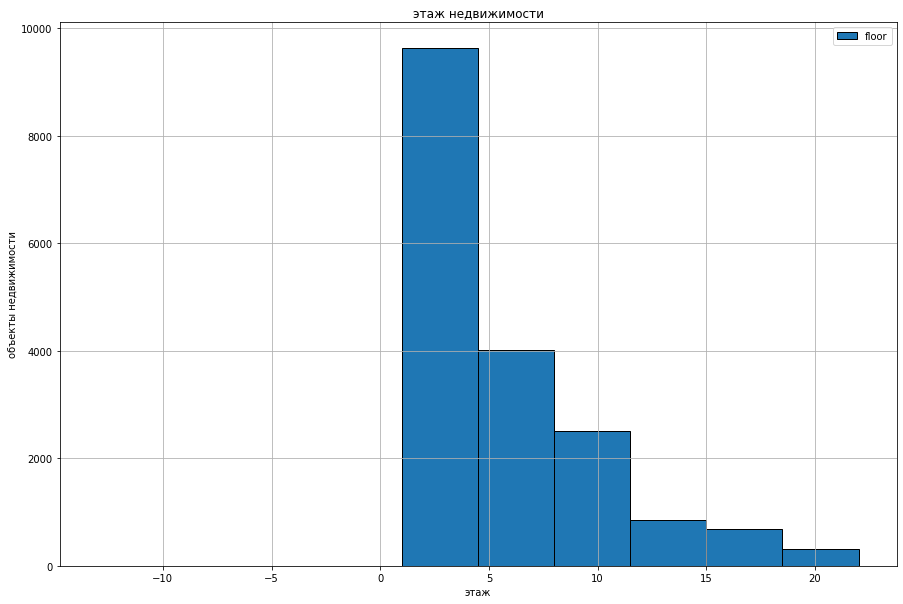

In [48]:
q1=data['floor'].quantile(.25)
q3=data['floor'].quantile(.75)
iqr=q3-q1
data['floor'].hist(range=((q1-3*iqr),(q3+3*iqr)),bins=10,figsize=(15,10), ec='black',legend=True)
plt.title('этаж недвижимости')
plt.xlabel('этаж')
plt.ylabel('объекты недвижимости')
plt.show()

Рассматривыемый диапозон от 1 по 20э

Самые расспространенные этажи с 1 по 4

Среднее значени 5 этажей медиана 4

Этажи свыше 10 встречается редко


**Категории этажей**

In [49]:
data['floor_category'].value_counts()

другой       13221
последний     2643
первый        2311
Name: floor_category, dtype: int64

<AxesSubplot:>

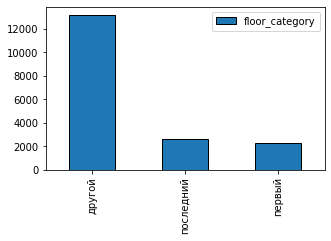

In [50]:
data['floor_category'].value_counts().plot.bar(figsize=(5, 3), ec='black', legend=True)

Видно что последний и первый этаж составляют небольшую часть,основные жтажи находятся в категории другой


**Этажность дома**

In [51]:
data['floors_total'].describe()

count    18136.000000
mean        10.163211
std          6.266593
min          1.000000
25%          5.000000
50%          9.000000
75%         14.000000
max         60.000000
Name: floors_total, dtype: float64

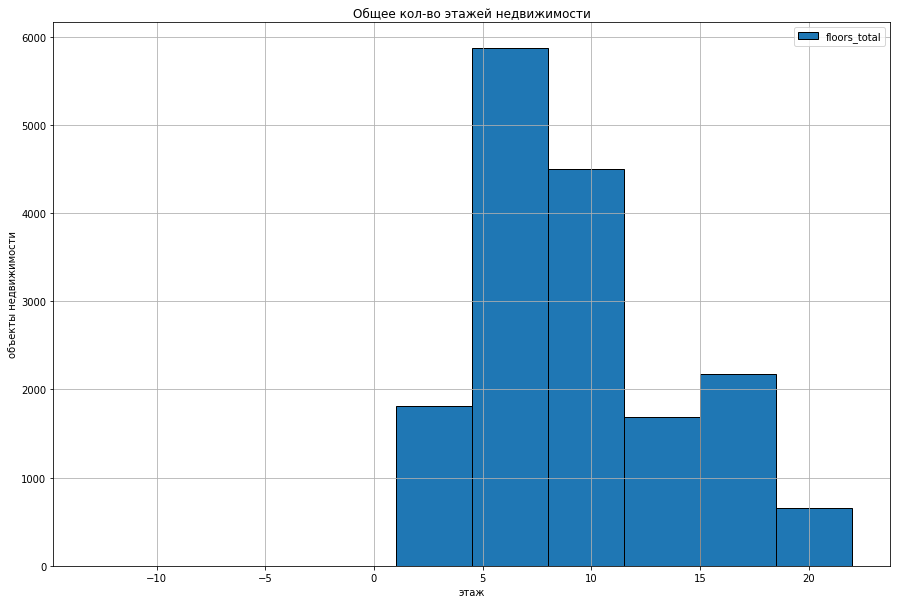

In [52]:
q1=data['floor'].quantile(.25)
q3=data['floor'].quantile(.75)
iqr=q3-q1
data['floors_total'].hist(range=((q1-3*iqr),(q3+3*iqr)),bins=10,figsize=(15,10), ec='black',legend=True)
plt.title('Общее кол-во этажей недвижимости')
plt.xlabel('этаж')
plt.ylabel('объекты недвижимости')
plt.show()

Рассматривыемый диапозон от 1 по 20 количество этажей

Самые расспространенные 5 и 9 этажки

Среднее значени 10 этажей медиана 9

от 10 до 20 этажей встречается редко,скорее всего это новостройки

**Расстояние до центра города в метрах**

In [53]:
data['city_centers_nearest'].describe()

count    14350.000000
mean     14130.946202
std       8764.020221
min        181.000000
25%       9049.000000
50%      12992.500000
75%      16121.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

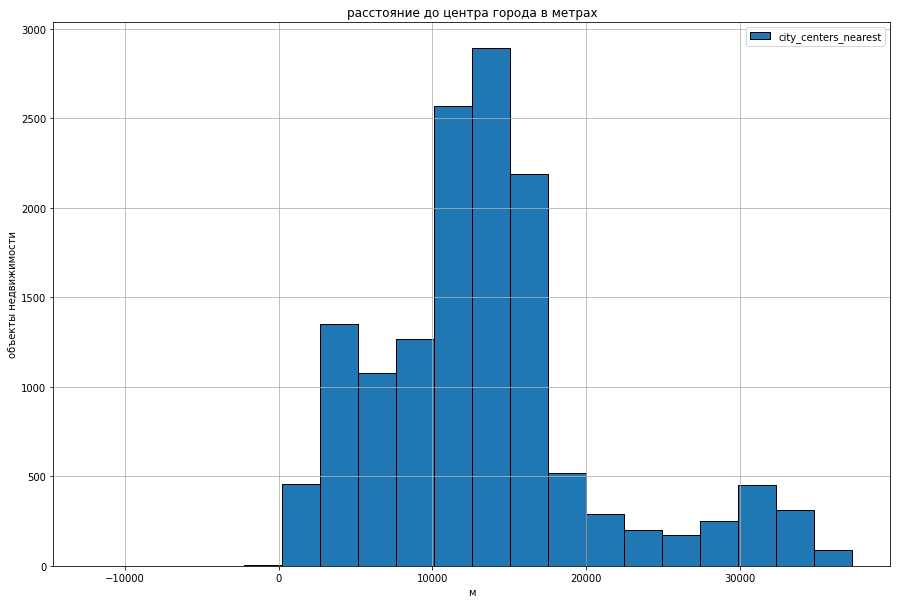

In [54]:
q1=data['city_centers_nearest'].quantile(.25)
q3=data['city_centers_nearest'].quantile(.75)
iqr=q3-q1
data['city_centers_nearest'].hist(range=((q1-3*iqr),(q3+3*iqr)),bins=20,figsize=(15,10), ec='black',legend=True)
plt.title('расстояние до центра города в метрах')
plt.xlabel('м')
plt.ylabel('объекты недвижимости')
plt.show()

Рассматривыемый диапозон от 0 до 25км

Большинство объектов недвижемости расположены от 13 до 15 км на удаление от центра

Так же встречаются и более отдалённые объекты

Среднее значение 13.9 медиана 13

**Расстояние до aэропортра города в метрах**

In [55]:
data['airports_nearest'].describe()

count    14332.000000
mean     28720.539911
std      12529.751829
min       6450.000000
25%      18582.000000
50%      26756.500000
75%      36969.000000
max      84869.000000
Name: airports_nearest, dtype: float64

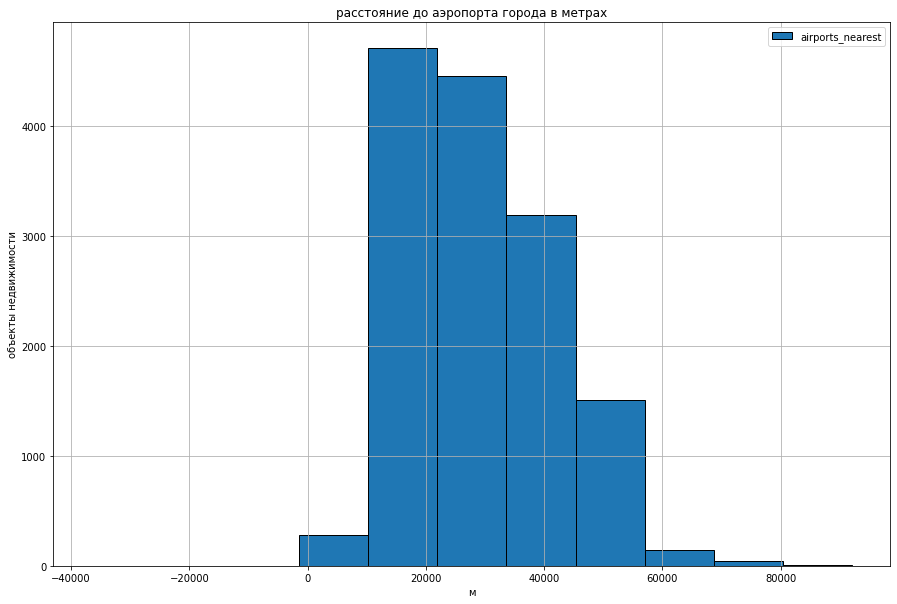

In [56]:
q1=data['airports_nearest'].quantile(.25)
q3=data['airports_nearest'].quantile(.75)
iqr=q3-q1
data['airports_nearest'].hist(range=((q1-3*iqr),(q3+3*iqr)),bins=11,figsize=(15,10), ec='black',legend=True)
plt.title('расстояние до аэропорта города в метрах')
plt.xlabel('м')
plt.ylabel('объекты недвижимости')
plt.show()

Рассматривыемый диапозон от 0 до 60км

Большинство объектов недвижемости расположены от 15 до 35 км на удаление от аэеропорта

Так же встречаются и более отдалённые объекты

Среднее значение 28 медиана 26

**Расстояние до парка в метрах**

In [57]:
data['parks_nearest'].describe()

count    6522.000000
mean      488.500307
std       334.212390
min         1.000000
25%       290.000000
50%       456.000000
75%       610.000000
max      3190.000000
Name: parks_nearest, dtype: float64

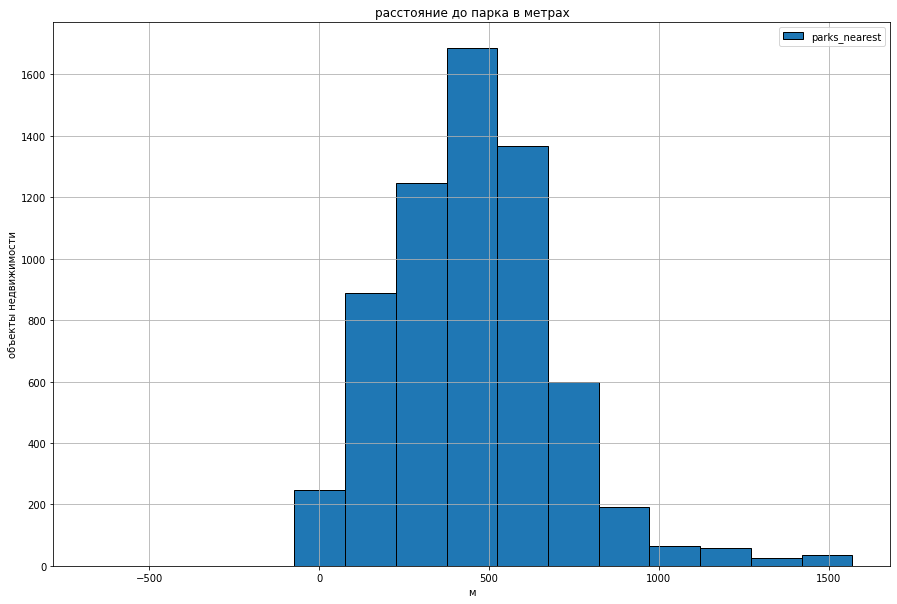

In [58]:
q1=data['parks_nearest'].quantile(.25)
q3=data['parks_nearest'].quantile(.75)
iqr=q3-q1
data['parks_nearest'].hist(range=((q1-3*iqr),(q3+3*iqr)),bins=15,figsize=(15,10), ec='black',legend=True)
plt.title('расстояние до парка в метрах')
plt.xlabel('м')
plt.ylabel('объекты недвижимости')
plt.show()

Рассматривыемый диапозон от 0 до 1.5км

Большинство объектов недвижемости расположены в радиусе 450 метров

Свыше 700 наблюдается резкий спад

Среднее значение 480 медиана 456м

**День и месяц публикации объявления**

In [59]:
data['exposition_weekday'].describe()

count    18175.000000
mean         2.551637
std          1.781063
min          0.000000
25%          1.000000
50%          2.000000
75%          4.000000
max          6.000000
Name: exposition_weekday, dtype: float64

<AxesSubplot:>

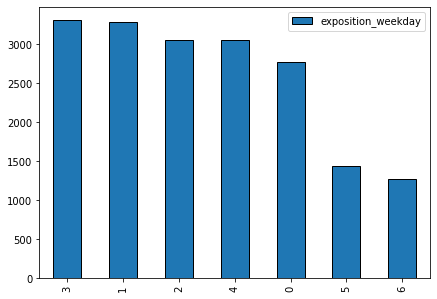

In [60]:
data['exposition_weekday'].value_counts().plot.bar(figsize=(7,5),ec='black',legend=True)

На графике видно,что середина недели самая публекуемая  в данном промежутке времени

In [61]:
data['exposition_month'].describe()

count    18175.000000
mean         6.411444
std          3.472694
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: exposition_month, dtype: float64

<AxesSubplot:>

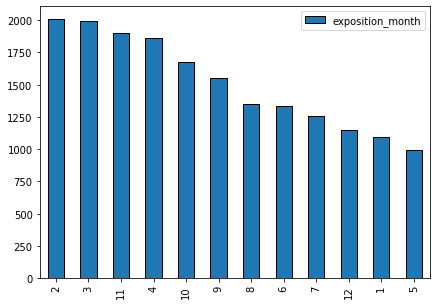

In [62]:
data['exposition_month'].value_counts().plot.bar(figsize=(7,5),ec='black',legend=True)

Весна самое популярное время года для продажи квартиры к середине  лета и к началу зимы объявление о продаже квартиры падает

**Вывод:**

Исходя из графиков виднно среднестатистическую квартиру в питере

Общая жилая площадь 45квм

Кухня 7 квм

4 этаж в 5-9 этажном доме

Высота потолков 2.6м

На удалении 15 км от центра и 25 от аэропорта города

Расстояние до парка примерно 500метров

Цена около 3 млн рублей

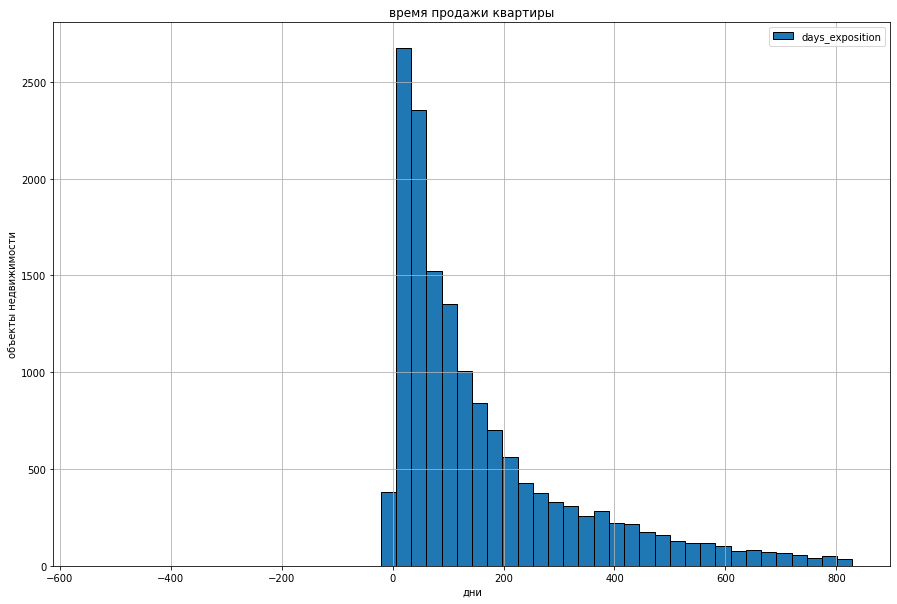

In [63]:
q1=data['days_exposition'].quantile(.25)
q3=data['days_exposition'].quantile(.75)
iqr=q3-q1
data['days_exposition'].hist(range=((q1-3*iqr),(q3+3*iqr)),bins=50,figsize=(15,10), ec='black',legend=True)
plt.title('время продажи квартиры')
plt.xlabel('дни')
plt.ylabel('объекты недвижимости')
plt.show()

На графике видны пики,но не понятно где,делать выводы некорректно,построим график со 100 днями

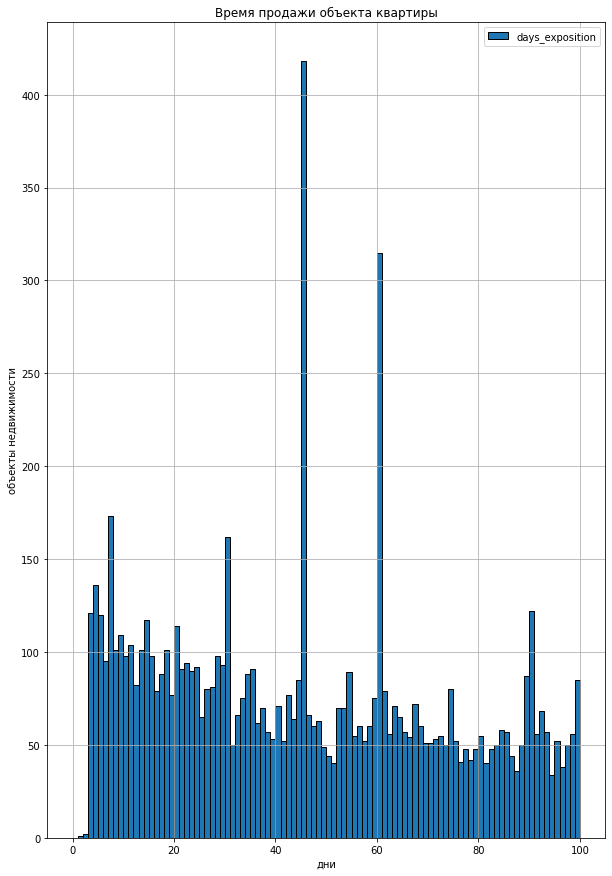

In [64]:
data['days_exposition'].hist(bins=100,range=(0, 100),figsize=(10,15),ec='black',legend=True)
plt.title('Время продажи объекта квартиры')
plt.xlabel('дни')
plt.ylabel('объекты недвижимости')
plt.show()

Видно что квартиры лучше всего продаются в 45 и 60 день объявления,но следует понимать чт ообъявление квартиры может закрыться автоматически(по истечению срока давности) или не закрыться пользователем и висеть.

In [65]:
#Посчитаем среднее и медиану
data['days_exposition'].describe()

count    15543.000000
mean       187.387634
std        223.305024
min          1.000000
25%         45.000000
50%        104.000000
75%        241.000000
max       1580.000000
Name: days_exposition, dtype: float64

Здесь видно что среднее время продажи квартиры 187 дней значение медианы равно 104,стандартное отклонение 223 ед.-это говорит о большом количестве выбрасов

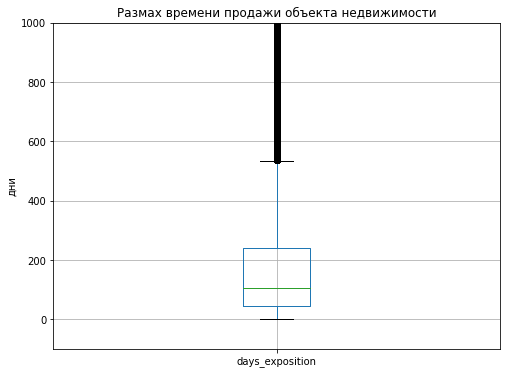

535.0


In [66]:
#Построим диаграмму размаха для корректного вывода
data.boxplot(column='days_exposition', figsize=(8, 6))
plt.title('Размах времени продажи объекта недвижимости')
plt.ylim(-100, 1000)
plt.ylabel('дни')
plt.show()
#все что выше этого значения выбросы
print(q3+1.5*iqr)

In [67]:
# Убираем выбросы
data_up=data.query('days_exposition<510')

Вывод:
Убрали из датафрейма строки которые содержали выбросы по времени продажи объекта. Оценка времени продажи: быстрая продажа - до 45 дней, нормальная продажа - от 45 до 231 дней, долгая продажа - от 231 до 510 дней. Продажи после 510 дней - выбросы.

In [68]:
#выведем название столбцов
data_up.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition', 'price_one_square_meter',
       'exposition_weekday', 'exposition_month', 'exposition_year',
       'city_centers_nearest_km', 'floor_category'],
      dtype='object')

In [69]:
#создадим 2 списка для парамтеров проверки 1 и построим матрицу кореляции
cor_param=['last_price','total_area','rooms','city_centers_nearest','exposition_weekday','exposition_month','exposition_year']
#2 с названниями параметров
сor_labels=['стоимость квартиры','общая площадь квартиры','количество комнат','расстояние\nдо центра города','день','месяц''год',]
#стриом матрицу
cor_matrix=data_up[cor_param].corr()
cor_matrix

,last_price,total_area,rooms,city_centers_nearest,exposition_weekday,exposition_month,exposition_year
last_price,1.000000,0.652986,0.339854,-0.259381,-0.005080,-0.000714,-0.023323
total_area,0.652986,1.000000,0.734548,-0.217497,-0.007405,0.003220,-0.074477
rooms,0.339854,0.734548,1.000000,-0.143585,-0.004780,0.004514,-0.054586
city_centers_nearest,-0.259381,-0.217497,-0.143585,1.000000,0.011044,-0.023207,0.015720
exposition_weekday,-0.005080,-0.007405,-0.004780,0.011044,1.000000,0.015246,-0.010333
exposition_month,-0.000714,0.003220,0.004514,-0.023207,0.015246,1.000000,-0.197865
exposition_year,-0.023323,-0.074477,-0.054586,0.015720,-0.010333,-0.197865,1.000000


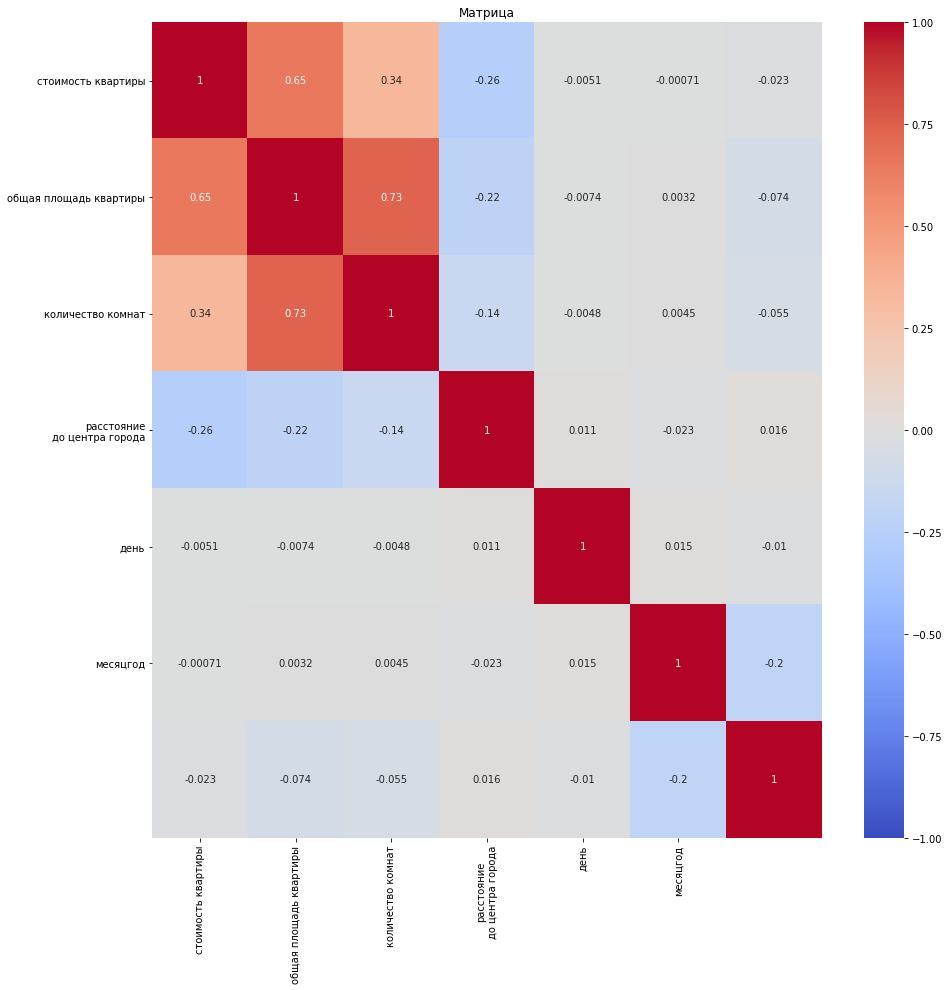

In [70]:
#отобразим с помощью heatmap
plt.figure(figsize=(15,15))
sns.heatmap(cor_matrix,vmin=-1,vmax=1,cmap='coolwarm',annot=True,yticklabels=сor_labels,xticklabels=сor_labels)
plt.title('Матрица')
plt.show()

**Вывод**

1.Линейная связь отсутвует между стоимостью и днем,месяцем и годом публикации объявления.

2.Слабая отрицательная связть проссматривается между стоимотстью и расстоянием до Ц.Чем меньше расстония тем выше цена

3.Положительную линейная связь связть видно между количеством комнат и стоимостью.Чем больше комнат -тем выше цена

4.Высокою положительную связь превышающую в 2 раза 3ий пункт видно между площадью и стомостью квартриы!

**ЧЕМ БОЛЬШЕ ПЛОЩДЬ -ТЕМ ВЫШЕ ЦЕНА**

Но так как критерии могут быь связаны между собой не линейно,построим дополнительные графики и сводные таблицы,что бы перепроверить информацию

**Количество комнат и цена**

,mean,count,median
rooms,,,
1,3.930039e+06,3577,3700000
2,5.377378e+06,5816,4700000
3,7.682365e+06,3951,6000000
4,1.115956e+07,707,8350000
5,1.389734e+07,125,11999000
6,1.931011e+07,19,13351000
7,2.702714e+07,7,22190000


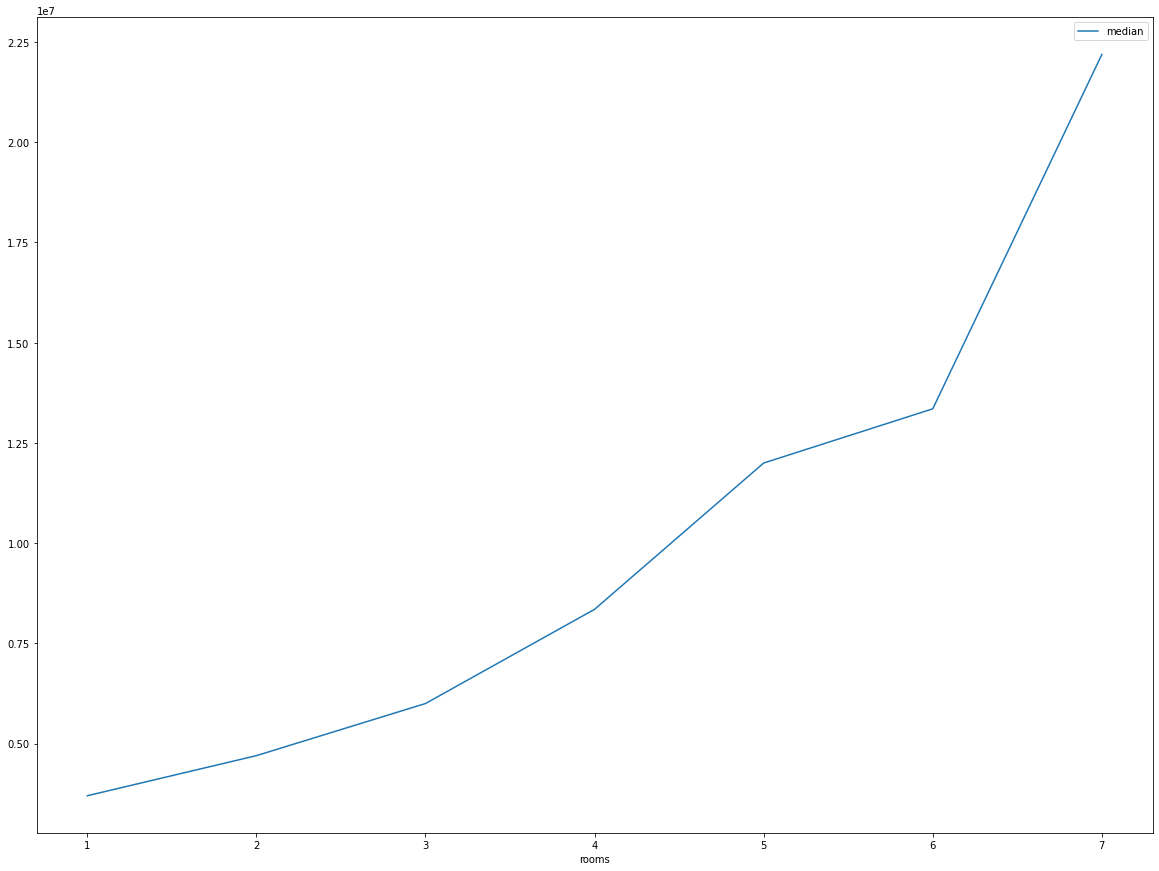

In [71]:
#построим своддную таблицу и график для зависимости между количество комнат и стомстью
pivot_table_rooms=data_up.pivot_table(index=('rooms'),values='last_price',aggfunc=['mean','count','median'])
pivot_table_rooms.columns=['mean','count','median']
pivot_table_rooms.plot(y='median',legend=True,figsize=(20,15))
pivot_table_rooms

На графике видно,что количество комнат,прямо влияет на цену квартиры

1-2 комнатные квартиры расцениваются до 5 млн

6 комнат колеблятся до 12-15 млн 

7 комнат стоят дороже 20 млн,такой резкий подъем в цене скорее всего обусловлен годом постройки и районом дома

**День недели и стомость**

,mean,count,median
exposition_weekday,,,
0,6.053601e+06,2099,4890000
1,6.038808e+06,2544,4850000
2,6.064216e+06,2347,4800000
3,6.163176e+06,2612,4800000
4,5.975354e+06,2479,4750000
5,6.073964e+06,1118,4762500
6,5.847355e+06,1003,4600000


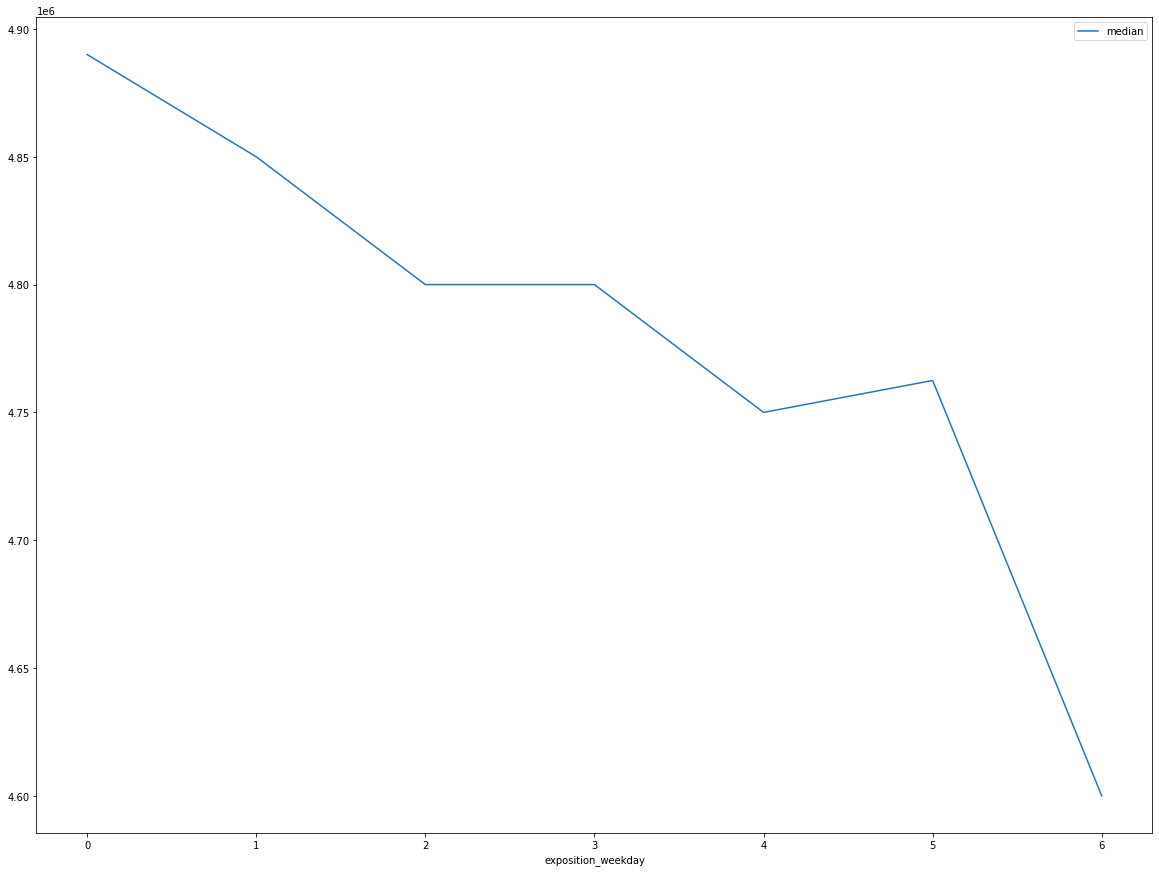

In [72]:
#построим своддную таблицу и график для зависимости между днём недели  и стомостью
pivot_table_weekday=data_up.pivot_table(index=('exposition_weekday'),values='last_price',aggfunc=['mean','count','median'])
pivot_table_weekday.columns=['mean','count','median']
pivot_table_weekday.plot(y='median',legend=True,figsize=(20,15))
pivot_table_weekday

На граифке видно,что медиана стремиться от большего к меньшему с начала недели и до ее конца

Предпологаю что в вскр сделки проводятся крайне редко,по этому у медианы наблюдается резкий спад

**Месяц и цена**

,mean,count,median
exposition_month,,,
1,5.945121e+06,833,4890000
2,6.062098e+06,1593,4800000
3,5.877661e+06,1310,4700000
4,6.256747e+06,1069,4800000
5,6.195646e+06,786,4750000
6,6.119139e+06,1142,4650000
7,6.043110e+06,1072,4867500
8,5.955953e+06,1164,4850000
9,6.316249e+06,1338,4900000


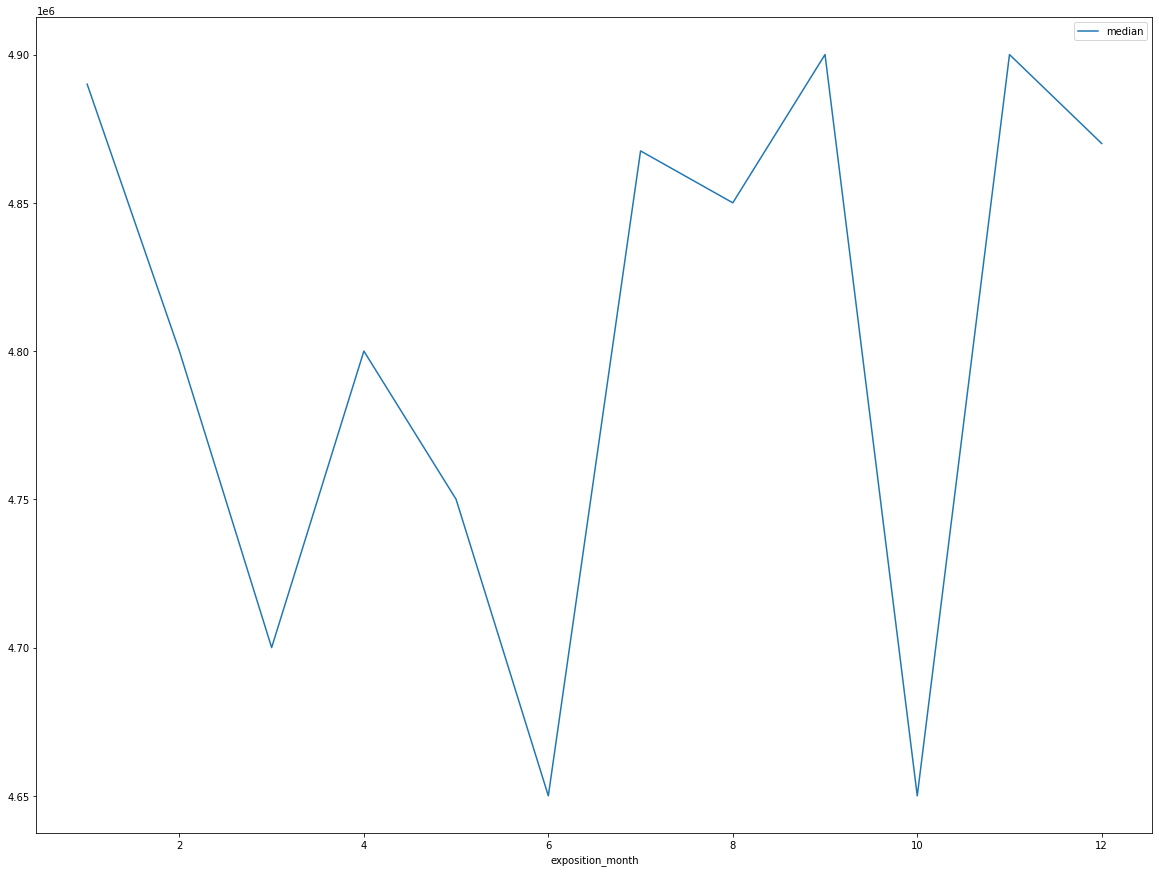

In [73]:
#построим своддную таблицу и график для зависимости между месяцами и стомстью
pivot_table_month=data_up.pivot_table(index=('exposition_month'),values='last_price',aggfunc=['mean','count','median'])
pivot_table_month.columns=['mean','count','median']
pivot_table_month.plot(y='median',legend=True,figsize=(20,15))
pivot_table_month

На графике видно

Что с середины лета и до конца зимы самый высокий спрос на продажу/покупку квартиры,лишь в октябре наблюдается небольшой спад

Но в целом значения между собой не так разняться самая низкая медиана состовляет 4.65 самый высокий показатель 4.90

**Год и цена**

,mean,count,median
exposition_year,,,
2015,6.268459e+06,381,5100000
2016,6.302355e+06,1695,4780000
2017,6.127693e+06,5906,4700000
2018,5.876841e+06,5387,4850000
2019,5.941397e+06,833,5045000


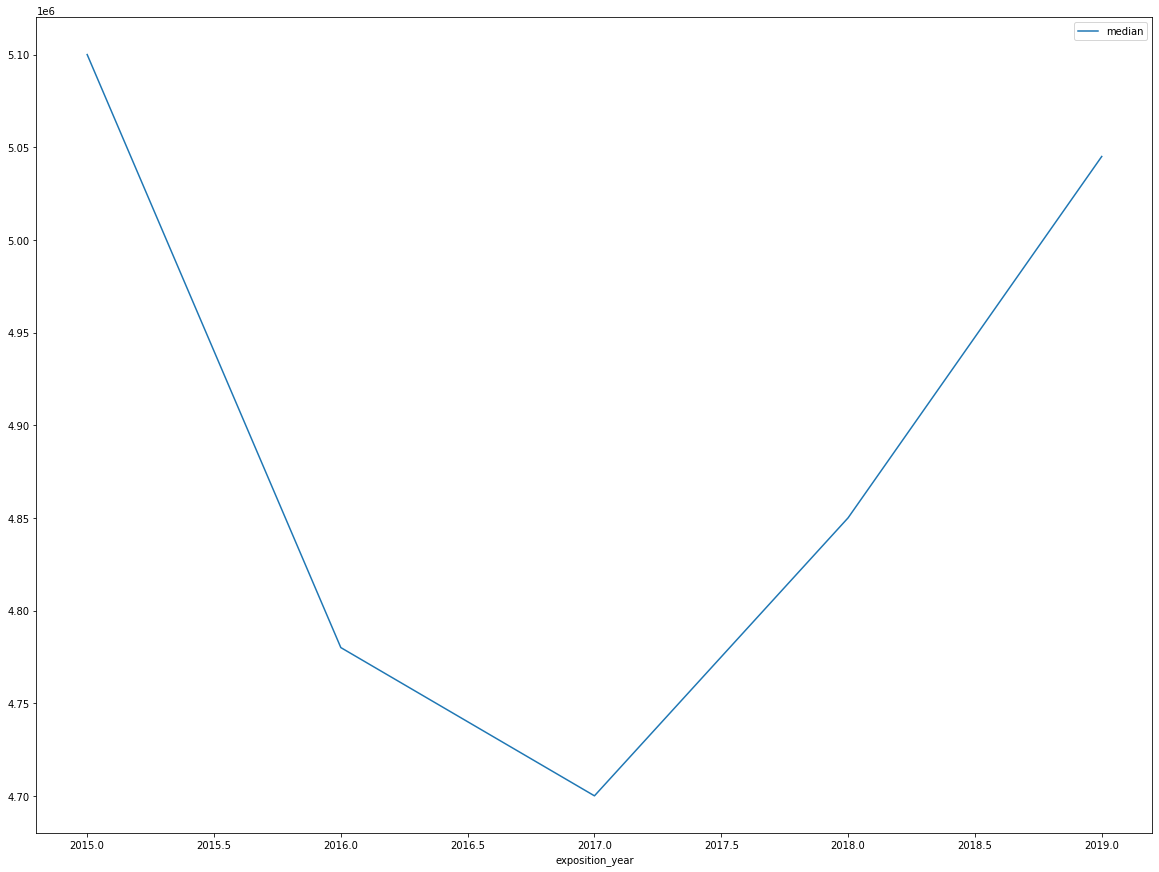

In [74]:
#построим своддную таблицу и график для зависимости между днём недели  и стомостью
pivot_table_year=data_up.pivot_table(index=('exposition_year'),values='last_price',aggfunc=['mean','count','median'])
pivot_table_year.columns=['mean','count','median']
pivot_table_year.plot(y='median',legend=True,figsize=(20,15))
pivot_table_year

На графике видно

Что начиная с 2015 по 2017год происходил спад в продажах

Начиная с 2017 по 2019 год Происходил поъём в продажах квартир

Медиана самого низкого значения 4.70 самый высокий 5.10 -2015 год и 5.05 2019

**Вывод 2**
Самые продающиеся квартриры были опубликованы в 2015 2019 году,предположительно в будние дни в период с осени по конец зимы

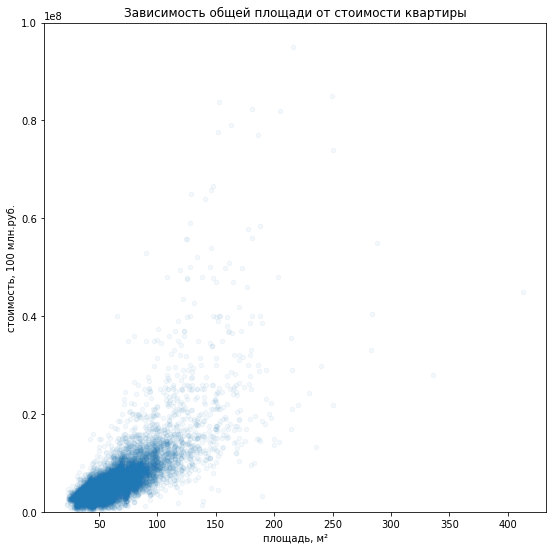

In [75]:
#Воспользуемся графиком scaterr
data_up.plot(x='total_area',y='last_price',kind='scatter',figsize=(9,9),alpha=0.05,legend=True,)
plt.title('Зависимость общей площади от стоимости квартиры')
plt.xlabel('площадь, м²')
plt.ylabel('стоимость, 100 млн.руб.')
plt.ylim(0, 100000000)
plt.show()

На графике видно ,что больше всего квартри ценой до 20 млн и площадью до 100 квадратов-Чем больше стоимость тем выше цена

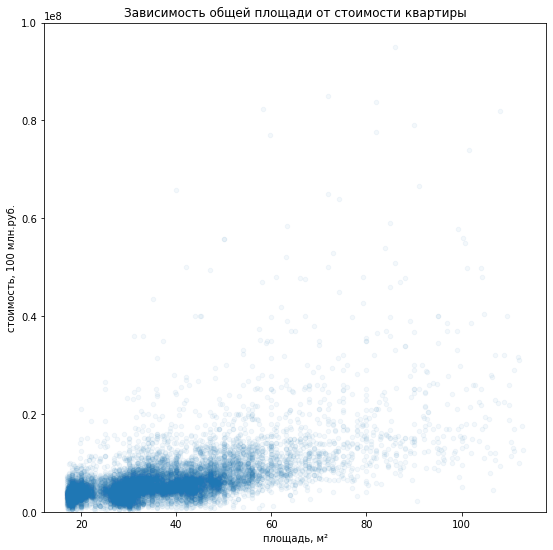

In [76]:
data_up.plot(x='living_area',y='last_price',kind='scatter',figsize=(9,9),alpha=0.05,legend=True,)
plt.title('Зависимость общей площади от стоимости квартиры')
plt.xlabel('площадь, м²')
plt.ylabel('стоимость, 100 млн.руб.')
plt.ylim(0, 100000000)
plt.show()

На графике видно,что больше всего квартир до 60квм и ценой до 15млн.Чем больше жилая площадь тем выше цена

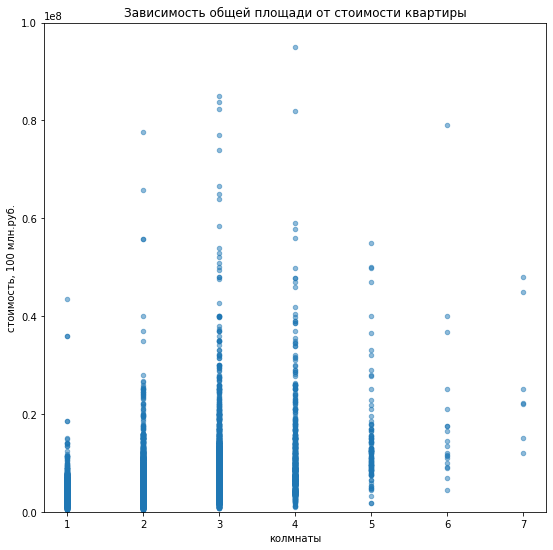

In [77]:
data_up.plot(x='rooms',y='last_price',kind='scatter',figsize=(9,9),alpha=0.5,legend=True,)
plt.title('Зависимость общей площади от стоимости квартиры')
plt.xlabel('колмнаты')
plt.ylabel('стоимость, 100 млн.руб.')
plt.ylim(0, 100000000)
plt.show()

На грфике видно,что количество комнат влияет на цену,самые распространненые варианты 3-4 комнаты.

Но на графике еще заметно что цены начинают снимажться после 5ком.Преполагаю что это связано с годом постройки дома и его планировки.скорее всего это старые дома


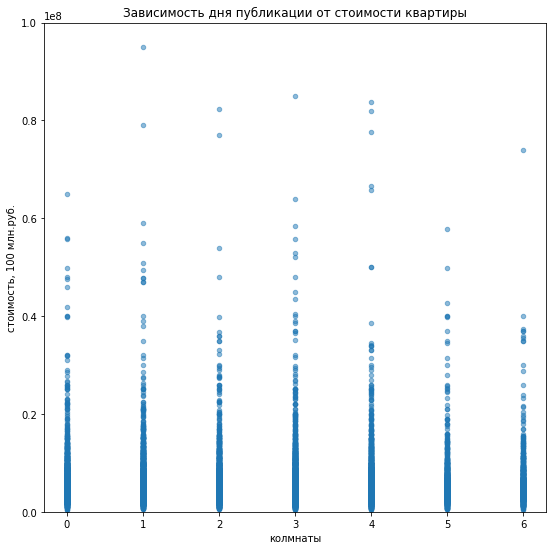

In [78]:
data_up.plot(x='exposition_weekday',y='last_price',kind='scatter',figsize=(9,9),alpha=0.5,legend=True,)
plt.title('Зависимость дня публикации от стоимости квартиры')
plt.xlabel('колмнаты')
plt.ylabel('стоимость, 100 млн.руб.')
plt.ylim(0, 100000000)
plt.show()

Зависимости между днями публикации и стомостью не прослеживается

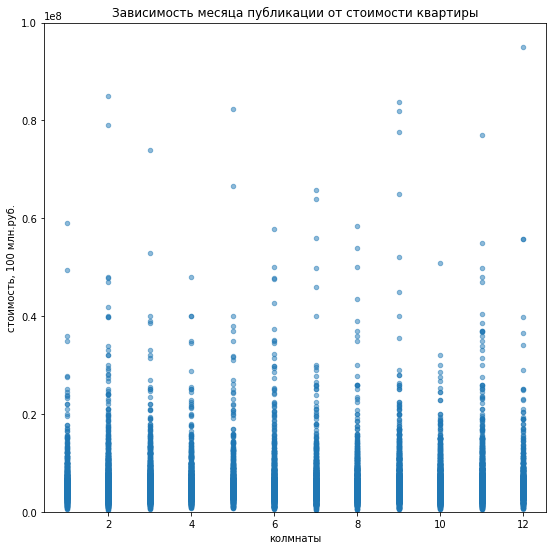

In [79]:
data_up.plot(x='exposition_month',y='last_price',kind='scatter',figsize=(9,9),alpha=0.5,legend=True,)
plt.title('Зависимость месяца публикации от стоимости квартиры')
plt.xlabel('колмнаты')
plt.ylabel('стоимость, 100 млн.руб.')
plt.ylim(0, 100000000)
plt.show()

Зависимость также не прослеживается

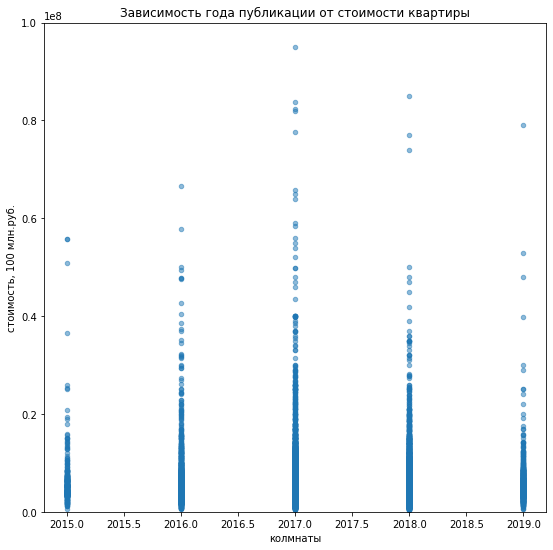

In [80]:
data_up.plot(x='exposition_year',y='last_price',kind='scatter',figsize=(9,9),alpha=0.5,legend=True,)
plt.title('Зависимость года публикации от стоимости квартиры')
plt.xlabel('колмнаты')
plt.ylabel('стоимость, 100 млн.руб.')
plt.ylim(0, 100000000)
plt.show()

Прослеживается не большой подъем между 2015-2017

C 2017 ПО 2019 наблюдается плавный спад

,mean,count,median
floor_category,,,
другой,6.344928e+06,10468,5000000.0
первый,4.574244e+06,1732,3999499.5
последний,5.757922e+06,2002,4400000.0


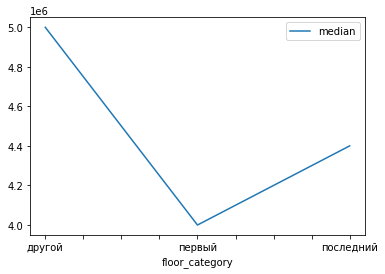

In [81]:
#построим своддную таблицу и график для зависимости между этажом и стомстью
pivot_table_floor=data_up.pivot_table(index='floor_category',values='last_price',aggfunc=['mean','count','median'])
pivot_table_floor.columns=['mean','count','median']
pivot_table_floor.plot(y='median',legend=True)
pivot_table_floor

На графике видно что медианное значение ближе к нулю в категории первый,в категории другой оно стремиться к максимуму

**Вывод:**

На общую стоимость квартриры влияет больше всего общая площадь и этаж квартиры

На первом и последнем этажах стоимат гораздо ниже чем на остальных

День,месяц и год практически никак не влияет на ее стоимость

In [82]:
#выведем 10ку населенных пунктов
top_10=data_up['locality_name'].value_counts().head(10)
#посчитаем среднею цену за квм в них
top_10_pivot=data_up.query('locality_name in @top_10.index').pivot_table(index='locality_name',values='price_one_square_meter')
top_10_pivot.sort_values(by='price_one_square_meter',ascending=False)

,price_one_square_meter
locality_name,
Санкт-Петербург,109288.399051
Пушкин,101721.087140
посёлок Парголово,83088.577452
Петергоф,82510.374211
посёлок Мурино,81427.997469
посёлок Шушары,75108.668885
Колпино,72688.251329
Гатчина,67107.849174
Всеволожск,66159.577297


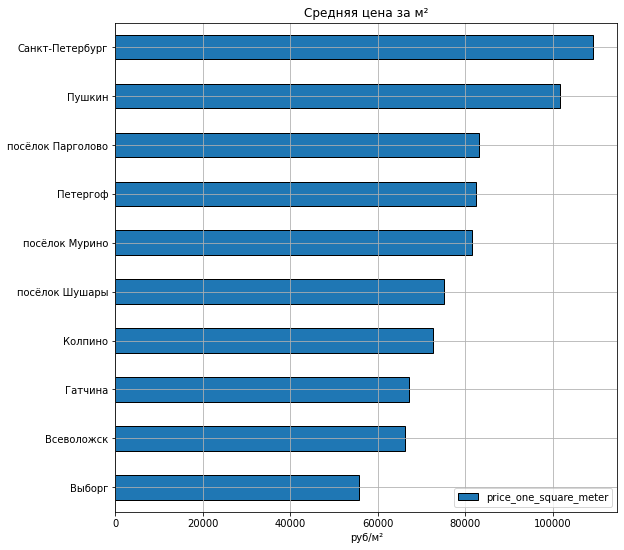

In [83]:
#отобразим на графике
top_10_pivot.sort_values(by='price_one_square_meter').plot(kind='barh', legend=True, grid=True, ec='black', figsize=(9,9))
plt.title('Средняя цена за м²')
plt.xlabel('руб/м²')
plt.ylabel('')
plt.show()

Вывод:

Исходя из результатов видно что высокие цены за квм это Санкт-петербург**109288**руб. и Пушкин **101721**руб.

Самый дешевый квм находится в городе Выборг **55707**руб.

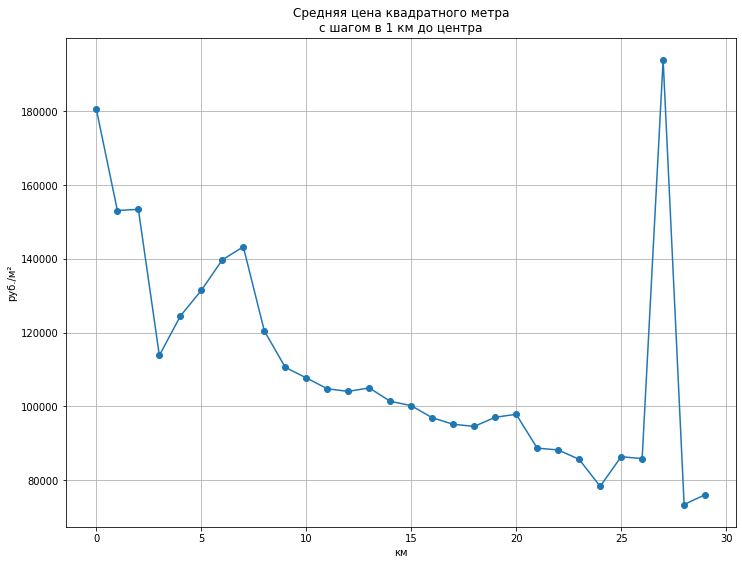

In [84]:
#Выделим только питер
data_spb=data_up.query('locality_name=="Санкт-Петербург"')
data_spb=data_spb.pivot_table(index='city_centers_nearest_km',values='price_one_square_meter')
data_spb.plot(marker='o',grid=True,figsize=(12,9),legend=False)
plt.title('Средняя цена квадратного метра\nс шагом в 1 км до центра')
plt.xlabel('км')
plt.ylabel('руб./м²')
plt.show()

Вывод:

Видно что где то после 7км идет тенденция на снижение цены

Пик в начале  говорит что самый дорогий квм в центре города

Второй пик после 25,скорее всего свидетельствует о новостройках элитного класса  

### Общий вывод

1.Для изучения датфрейма были использованы 3 библиотеки pandas,matnplotlib и seaborn

2.Была просмотрена общая информация о датафрейме,удалены дубликаты,заменены пропуски там где это возможно,а так же вырезаны аномалии и выбросы-для сблласированого иследования

3.На стоимость квартиры влияет общая площадь и колчество комнат,чем выше эти показатели тем выше стомость квартиры,так же была определена зона центра города это примерно 7-8 км,публикация объявлений с осени по конец зимы и в будние дни недели

**4.Была составлена среднепродающаюся квартрира:**

Общая жилая площадь 45квм

Кухня 7 квм

4 этаж в 5-9 этажном доме

Высота потолков 2.6м

На удалении 15 км от центра

На удаление 20 км от аэропорта

Расстояние до парка примерно 500метров

Цена около 3 млн рублей

**5.Установлены приблезительные сркои продажи:**

Оценка времени продажи: быстрая продажа - до 45 дней, нормальная продажа - от 45 до 231 дней, долгая продажа - от 231 до 510 дней.

**6.Установлены самый дорогой и самый дешевый квм**

Это Санкт-петербург**109288**руб. и Пушкин **101721**руб.(топ10)

Самый дешевый квм находится в городе Выборг **55707**руб.(топ10)